<a href="https://www.kaggle.com/code/cicinguyen/predicting-house-prices-xgb-rf?scriptVersionId=141197448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


<div style="background-color: #e6ffe6; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 38px; font-family: Arial;">🏚 Predicting House Prices Using LR RF XGB 💰 </h2>
</div>

 <img src="https://img.freepik.com/free-photo/finances-elements-wooden-cubes-arrangement_23-2148793814.jpg?w=996&t=st=1692838873~exp=1692839473~hmac=e3687dd32c08f52e904f571863ce438daef8aae14602a0e836e92f8b17120a15" style="max-width: 100%; height: auto; margin-top: 20px; display: block; margin-left: auto; margin-right: auto;">


<div style="background-color: #f0f0f0; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 25px; font-family: Arial;font-weight: bold;"> Introduction </h2>
</div>

<div style="background-color: #e6ffe6; border: 2px solid #9ACD32; padding: 10px; text-align: center;">
    <p style="font-size: 16px; font-family: Arial;">This project showcases how data science techniques can tackle real-world challenges in the housing market, offering informed insights for decision-makers</p>
    <p style="font-size: 16px; font-family: Arial;">In this project, I aim to predict house prices using advanced regression techniques. Housing prices are influenced by a multitude of factors, making accurate predictions crucial for buyers, sellers, and real estate professionals. 
        By implementing regression models like Gradient Boosting and Random Forest, I strive to build a reliable prediction framework. This notebook emphasizes data preprocessing, feature engineering, and hyperparameter tuning to enhance model performance.</p>
</div>

<div style="background-color: #f0f0f0; padding: 10px;text-align: left;">
    <h2 style="color: #006400; font-size: 18px; font-family: Arial;font-style: italic;">Join me on this journey to uncover housing data trends and develop a powerful predictive tool for the dynamic real estate landscape!</h2></div>

<div style="background-color: #f0f0f0; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 25px; font-family: Arial;font-weight: bold;"> Data Overview </h2>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h2 style="color: #006400; font-size: 20px; font-family: Arial;font-weight: bold;"> 1. Read Data </h2>
</div>

In [3]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('Number of rows:', train_df.shape[0])
print('Number of columns:', train_df.shape[1])

Number of rows: 1460
Number of columns: 81


In [5]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<h2 style="color: #006400; font-size: 20px; font-family: Arial;font-weight: bold;"> 2. Check for Duplicated and Missing Values </h2>
</div>

In [8]:
duplicated_data = train_df.duplicated().any()
duplicated_data

False

In [9]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [12]:
# Handle missing values in numerical columns with median
num_cols = train_df.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis=1).columns
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[num_cols] = test_df[num_cols].fillna(train_df[num_cols].median())  # Fill with train median

# Handle missing values in categorical columns with mode
cat_cols = train_df.select_dtypes(include=['object']).columns
train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])
test_df[cat_cols] = test_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])  # Fill with train mode

In [13]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

<h2 style="color: #006400; font-size: 20px; font-family: Arial;font-weight: bold;"> 3. Distribution of Target Variable (SalePrice) </h2>
</div>

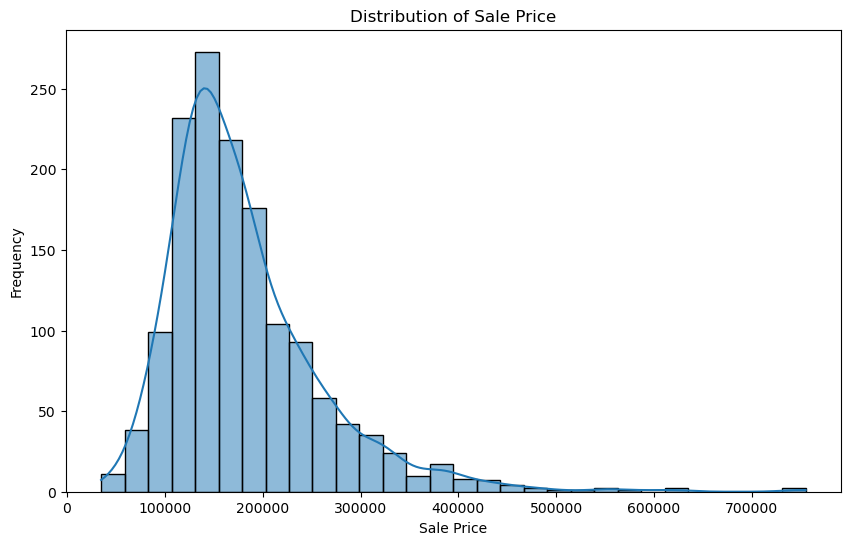

In [14]:
# Distribution of SalePrice
plt.figure(figsize=(10,6))
sns.histplot(train_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

<h2 style="color: #006400; font-size: 20px; font-family: Arial;font-weight: bold;"> 4. Feature Selection and Correlation </h2>
</div>

<h2 style="color: #000; font-size: 20px; font-family: Arial;"> Exploring the relationships between various features and the target variable (SalePrice) is essential for understanding which features might have a significant impact on the target. </h2>
</div>

In [15]:
num_features = ['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

cat_features = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual','KitchenQual', 'GarageFinish', 'CentralAir']

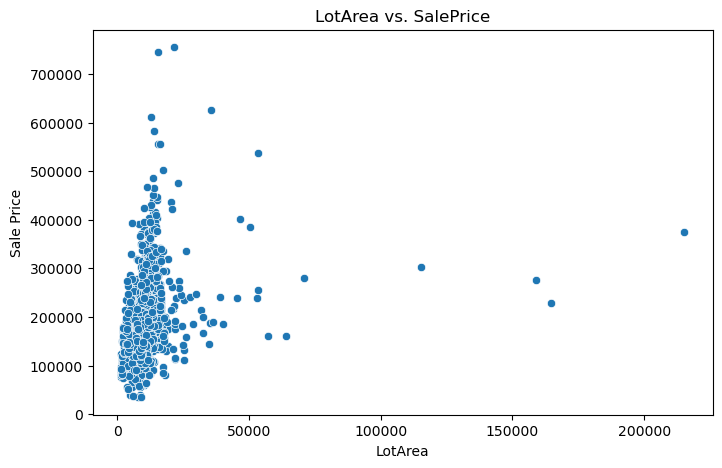

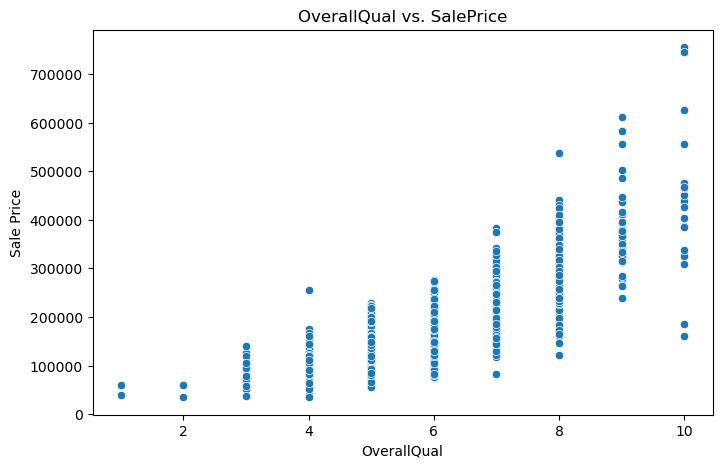

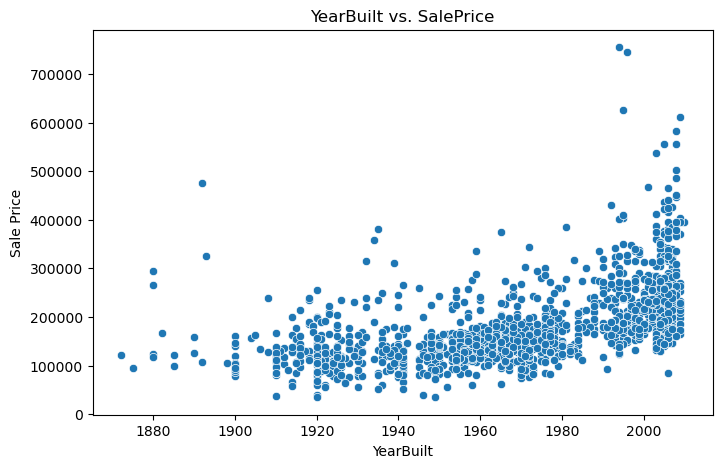

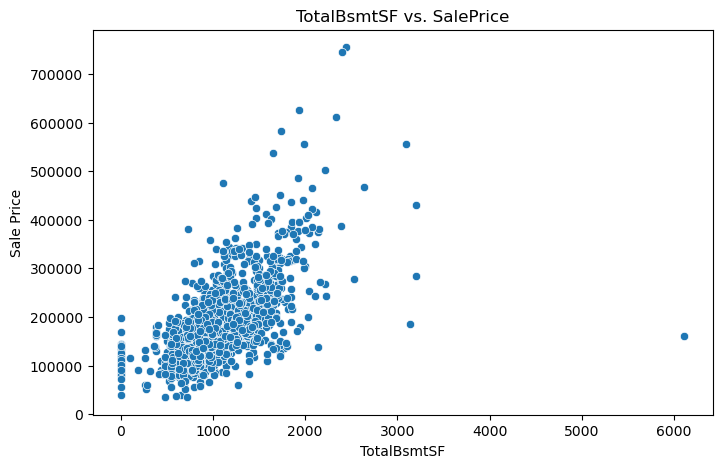

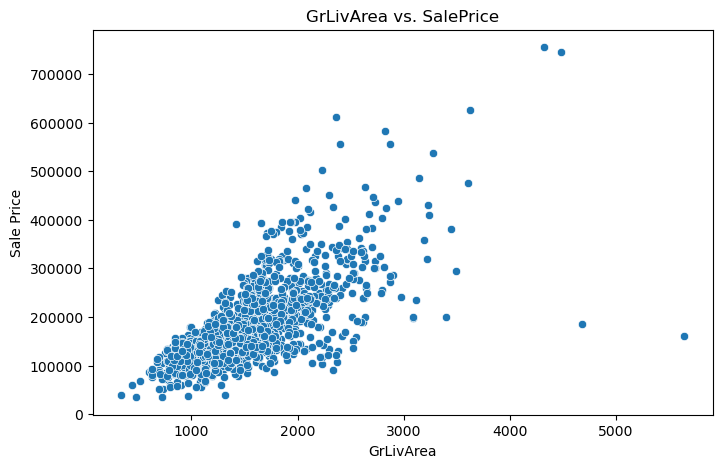

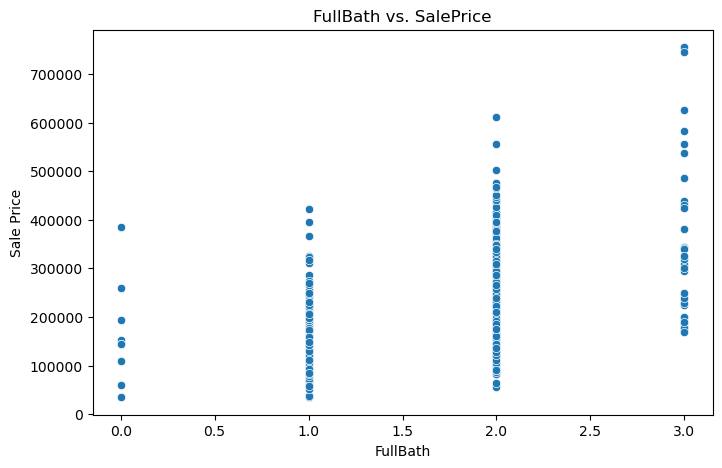

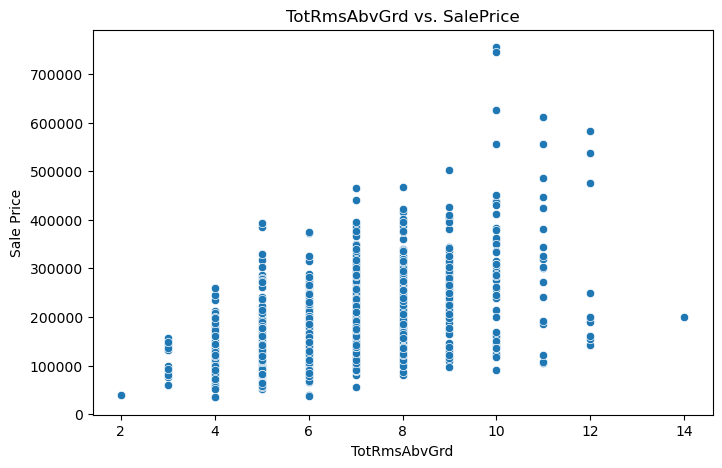

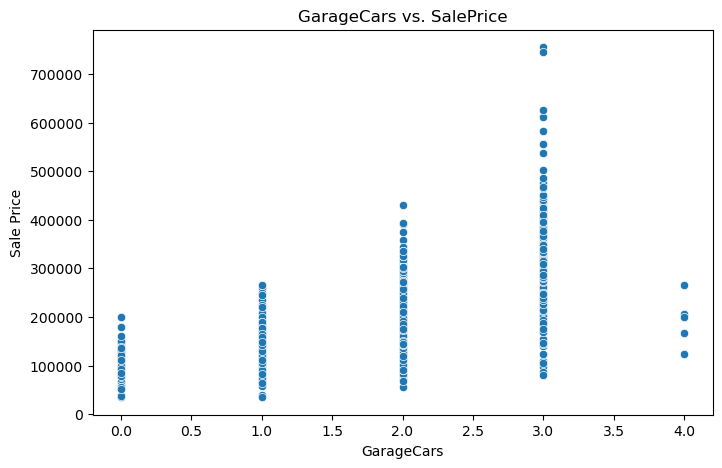

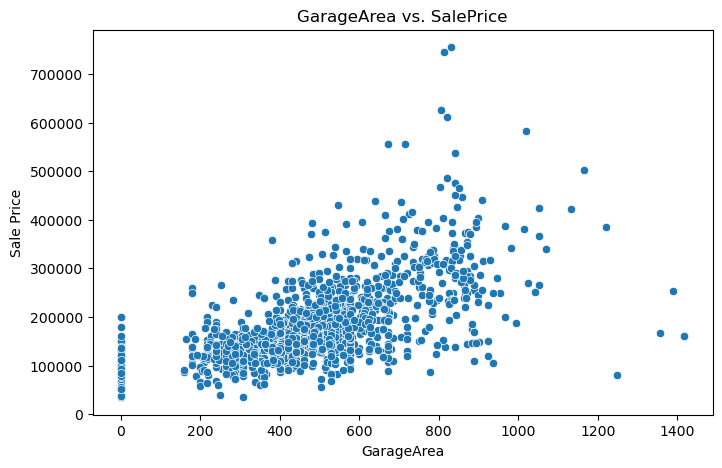

In [16]:
# Scatter plots for selected numerical features vs. SalePrice
for feature in num_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=feature, y='SalePrice', data=train_df)
    plt.title(f'{feature} vs. SalePrice')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

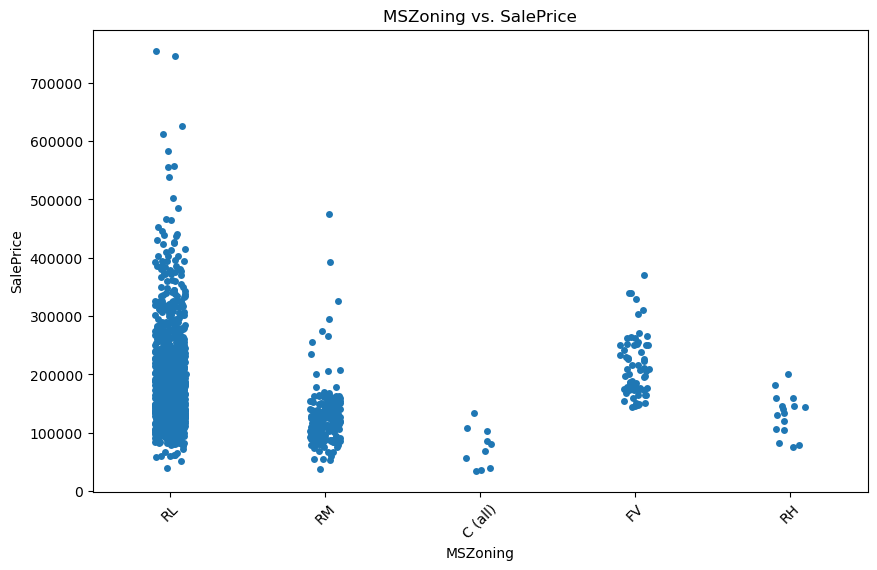

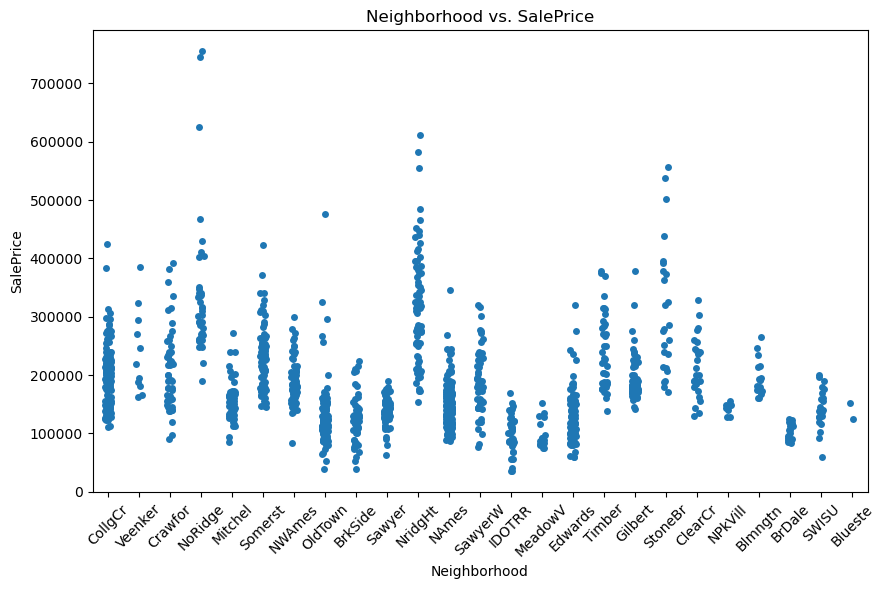

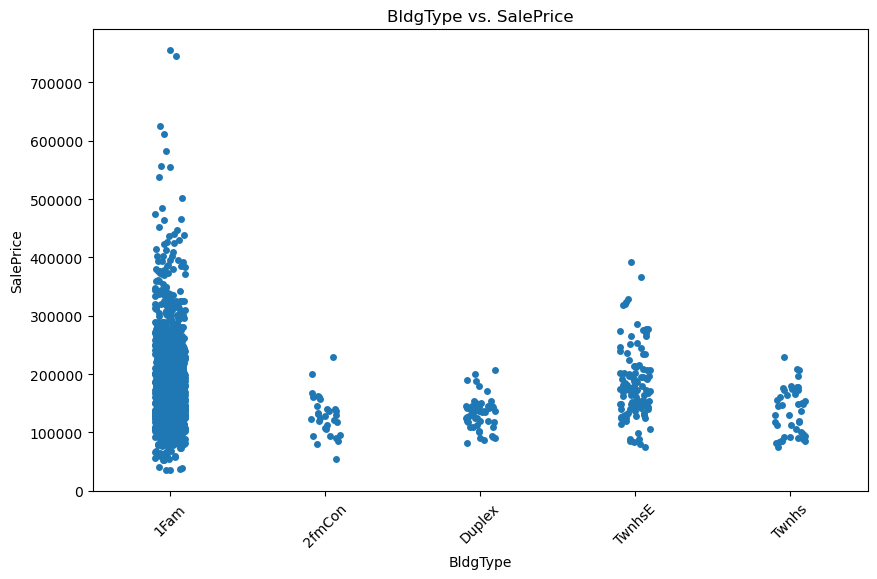

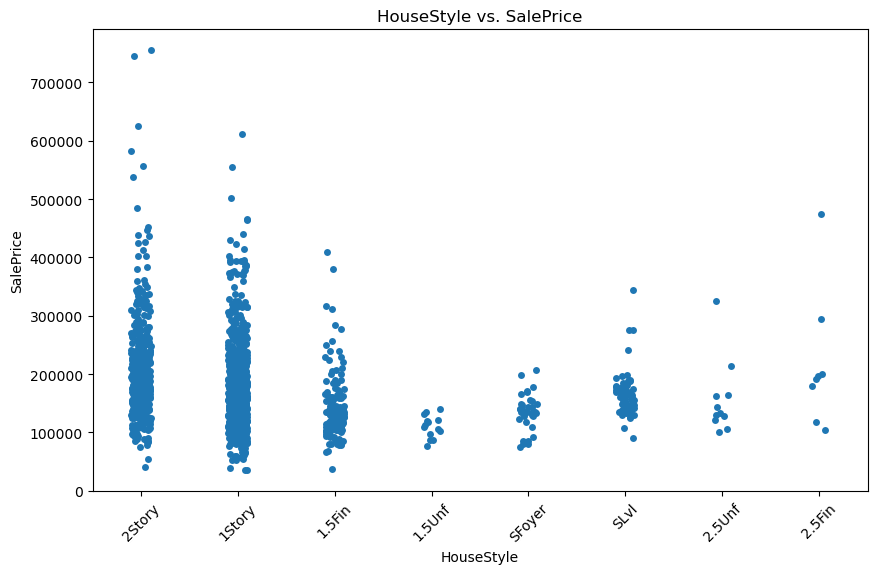

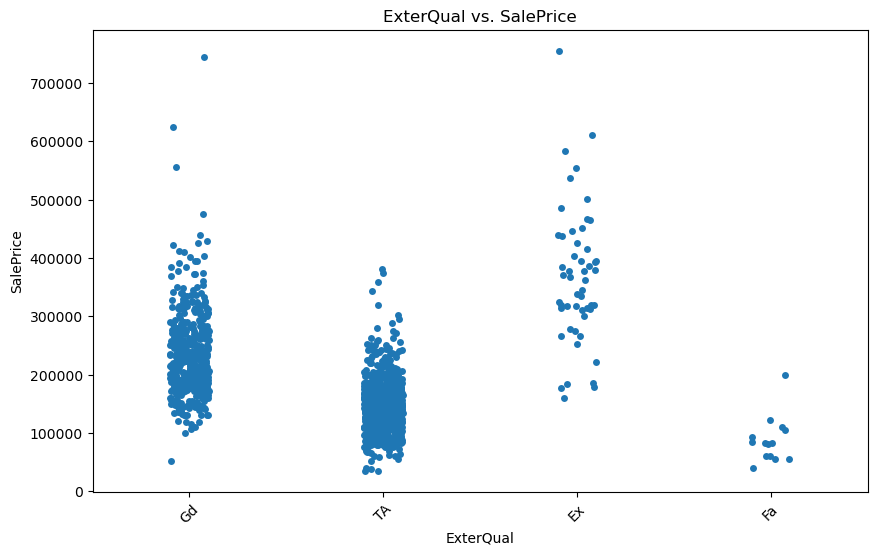

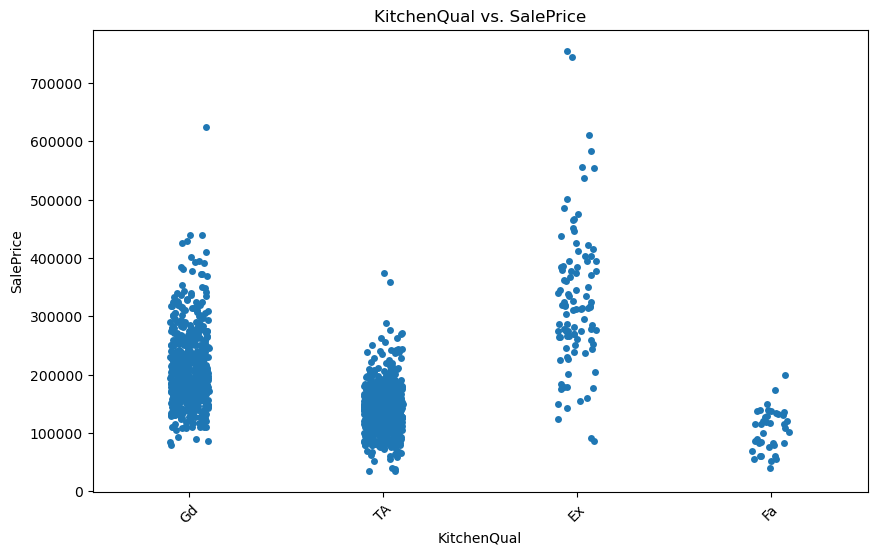

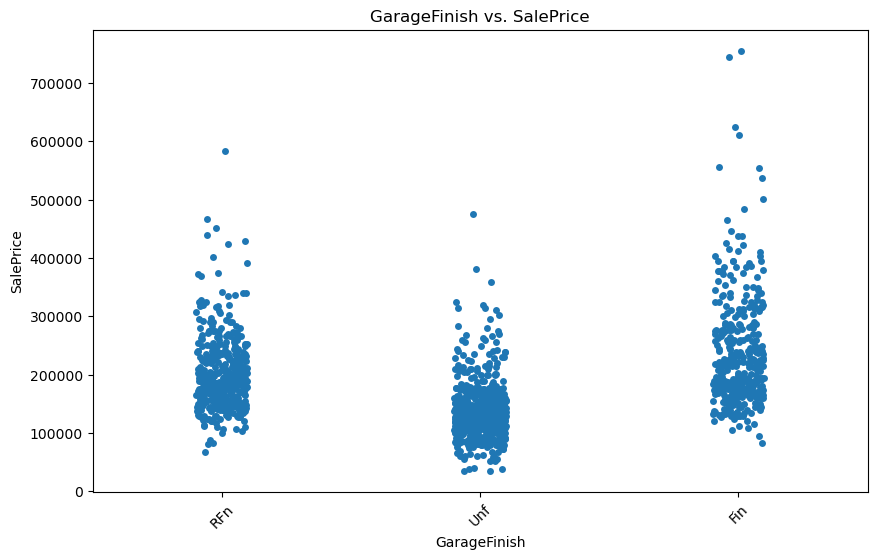

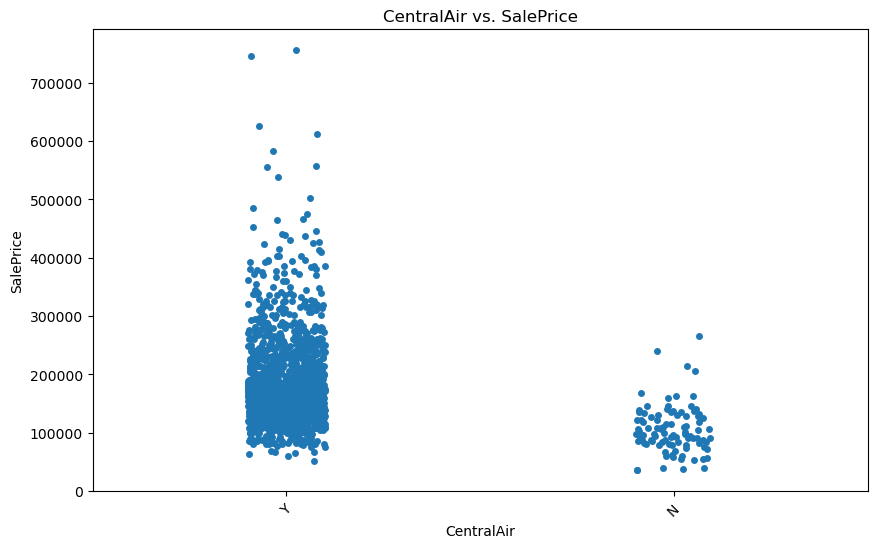

In [17]:
# Categorical Features

for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x=feature, y='SalePrice', data=train_df, jitter=True)
    plt.title(f'{feature} vs. SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()

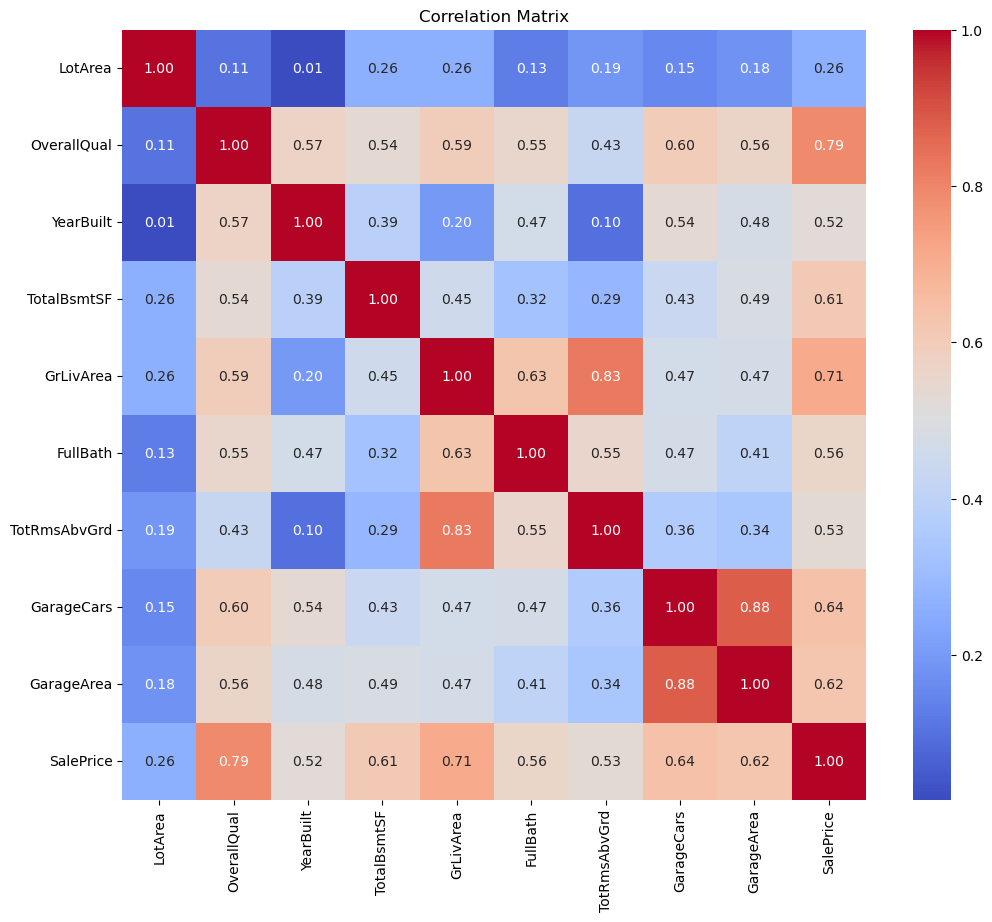

In [18]:
# Explore Correlation
corr_matrix = train_df[num_features + ['SalePrice']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


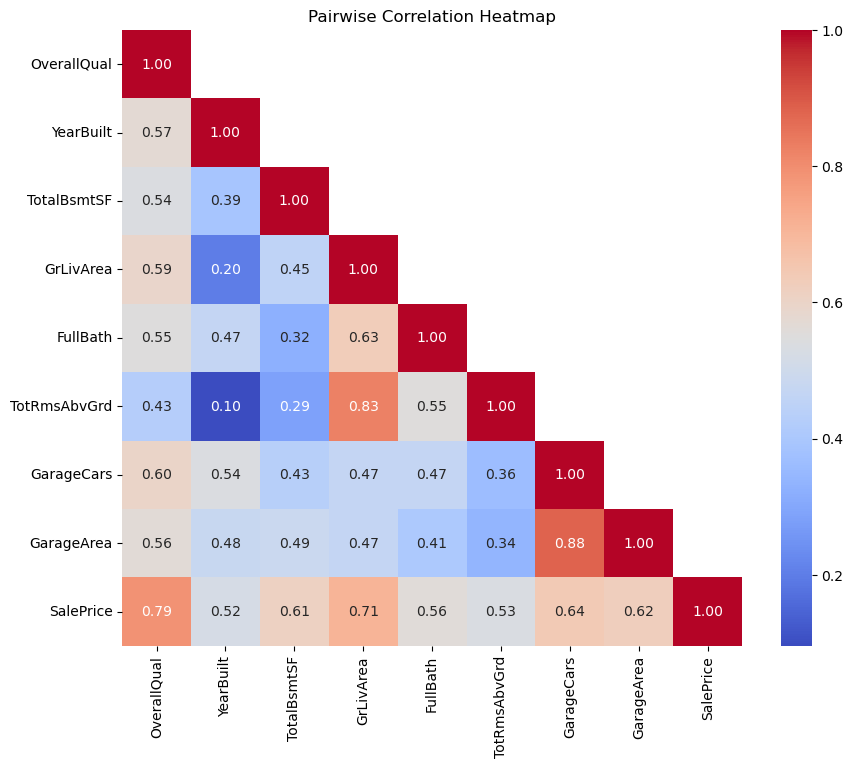

In [19]:
# Filter features with strong correlation with SalePrice
strong_features = corr_matrix[(corr_matrix['SalePrice'] > 0.5) | (corr_matrix['SalePrice'] < -0.5)].index
print(strong_features)

# Calculate pairwise correlations for selected features
selected_corr_matrix = train_df[strong_features].corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones(selected_corr_matrix.shape), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Pairwise Correlation Heatmap")
plt.show()

<h2 style="color: #000; font-size: 20px; font-family: Arial;"> Identify High Correlations with possible multicollinearity:

* GrLivArea and OverallQual
* FullBath and OverallQual, GrLivArea
* TotRmsAbvGrd and GrLivArea, FullBath
* GarageCars and OverallQual, GarageArea
* GarageArea and OverallQual, GarageCars</h2>
</div>

<div style="background-color: #e6ffe6; border: 2px solid #9ACD32; padding: 10px; text-align: center;">
<p style="font-size: 20px; font-family: Arial;">Check VIF (Variance Inflation Factor):
    
Variance Inflation Factor (VIF) is a measure to detect multicollinearity. Calculate the VIF for each feature using the formula: VIF = 1 / (1 - R^2), where R^2 is the coefficient of determination in a regression model predicting the feature from the other features. High VIF values (usually greater than 5 or 10) indicate high multicollinearity.</p>
</div>

In [20]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

multicollinear_features = ['GrLivArea', 'OverallQual', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
check_data = train_df[multicollinear_features]

vif_data = pd.DataFrame()
vif_data["feature"] = multicollinear_features
vif_data["VIF"] = [variance_inflation_factor(check_data, i) for i in range(len(multicollinear_features))]
print(vif_data)

        feature        VIF
0     GrLivArea  33.679044
1   OverallQual  26.369930
2      FullBath  17.174524
3  TotRmsAbvGrd  36.373941
4    GarageCars  33.171850
5    GarageArea  27.754444


<div style="background-color: #FFC0CB; border: 2px solid #FFFF00; padding: 10px; text-align: center;">
<p style="font-size: 20px; font-family: Arial;">📛 GrLivArea, OverallQual, TotRmsAbvGrd, GarageCars, and GarageArea all have VIF values well above the threshold, indicating significant multicollinearity. These features are highly correlated with each other, and their presence together might lead to unstable coefficient estimates in a regression model.</p>
</div>

<div style="background-color: #e6ffe6; border: 2px solid #9ACD32; padding: 10px; text-align: left;">
<h2 style="color: #000; font-size: 20px; font-family: Arial;"> Identify GrLivArea vs. TotRmsAbvGrd:
Both of these features are related to the size and number of rooms in the house. keep GrLivArea, it provides continuous information about the living area. </h2>

<h2 style="color: #000; font-size: 20px; font-family: Arial;"> GarageCars vs. GarageArea:
These features are both related to the garage, but they measure different aspects. GarageCars represents the capacity of the garage in terms of the number of cars it can hold, while GarageArea is the size of the garage in square feet. Personally, the size of the garage might be more important.</h2>
<h2 style="color: #000; font-size: 20px; font-family: Arial;"> OverallQual vs. Other Features:
OverallQual represents the overall quality of the house. It's common for quality-related features to be highly correlated with various other features. Since the goal is to predict house prices, OverallQual might be considered a key feature, and dropping it could impact model performance. In this case, keep OverallQual.</h2>
</div>

<div style="background-color: #f0f0f0; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 25px; font-family: Arial;font-weight: bold;"> Predictive Model </h2>
</div>


<div style="background-color: #e6ffe6; border: 2px solid #9ACD32; padding: 10px; text-align: left;">
<h2 style="color: #000; font-size: 20px; font-family: Arial;"> Models to try:
        <ul style="font-size: 16px; font-family: Arial; text-align: left;">
        <li>Linear Regression</li>
        <li>Random Forest Regressor</li>
        <li>Gradient Boosting Regressor</li>
    </ul></div>

In [21]:
# Select numerical and categorical features
numerical_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageArea']
categorical_features = ['Neighborhood', 'BldgType', 'CentralAir', 'HouseStyle']

X_num = train_df[numerical_features]
X_cat = train_df[categorical_features]
y = train_df['SalePrice']

In [22]:
from sklearn.model_selection import train_test_split
# Combine numerical and categorical features
X_combined = pd.concat([X_num, X_cat], axis=1).reset_index()

# Split data into training and validation sets
X_train_combined, X_valid_combined, y_train, y_valid = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the list of models
models = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    Ridge(alpha=1.0)
]

# Preprocessing for numerical features (scaling)
numerical_transformer = StandardScaler()

# Preprocessing for categorical features (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create lists to store RMSE and R-squared scores for each model
rmse_scores = []
r2_scores = []
model_names = []
# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Loop through each model
for model in models:
    model_names.append(type(model).__name__)
    # Create the pipeline with the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Fit the model
    pipeline.fit(X_train_combined, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_valid_combined)
    
    # Calculate RMSE and R-squared
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    r2 = r2_score(y_valid, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)


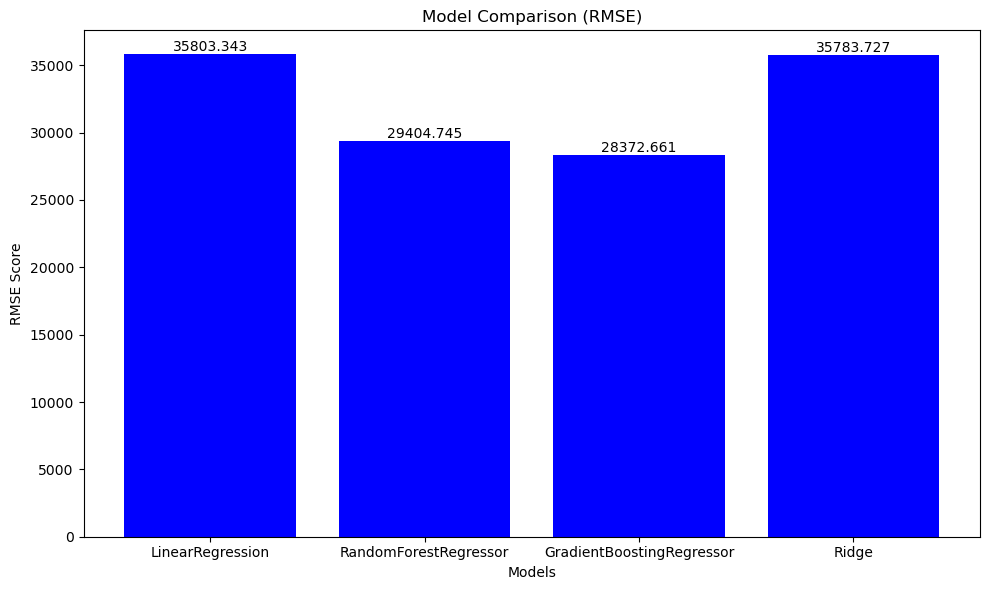

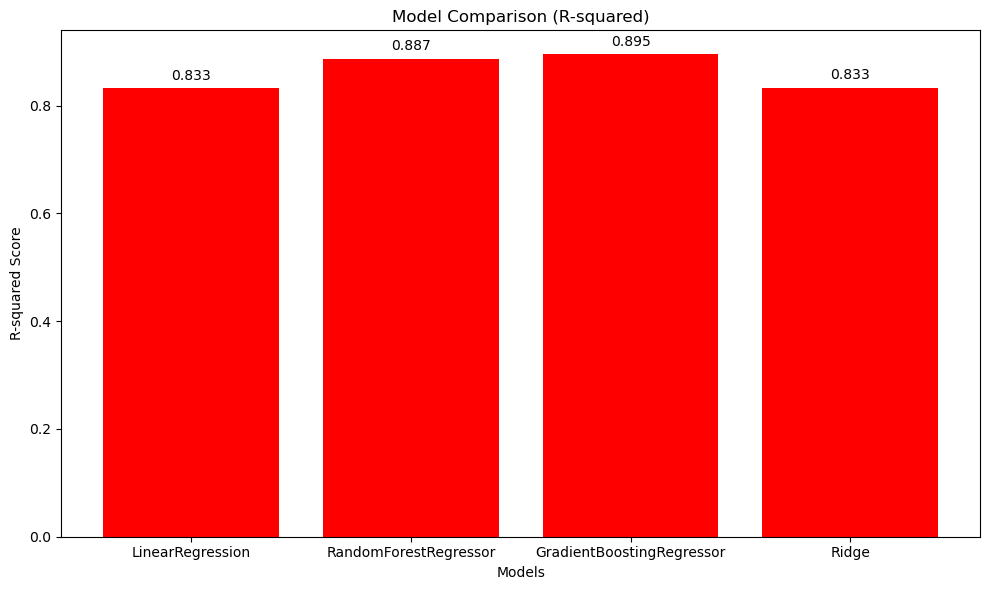

In [24]:
# Define the index based on the number of models
index = range(len(models))

# Function to add labels on top of the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

# Plot RMSE scores
plt.figure(figsize=(10, 6))
bars_rmse = plt.bar(index, rmse_scores, color='b')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('Model Comparison (RMSE)')
plt.xticks(index, model_names)
add_labels(plt.gca(), rmse_scores)
plt.tight_layout()
plt.show()

# Plot R-squared scores
plt.figure(figsize=(10, 6))
bars_r2 = plt.bar(index, r2_scores, color='r')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Model Comparison (R-squared)')
plt.xticks(index, model_names)
add_labels(plt.gca(), r2_scores)
plt.tight_layout()
plt.show()

Gradient Boosting has the highest R-squared and lowest RMSE among the models you've tested. Random Forest also performs well, but slightly lower than Gradient Boosting in terms of R-squared and RMSE

<div style="background-color: #f0f0f0; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 25px; font-family: Arial;font-weight: bold;"> Fine Tuning Hyperparameters </h2>
</div>

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__subsample': [0.8, 1.0]
}

# Create the pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor(random_state=42))])

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid, scoring='r2', cv=5, verbose=0, n_jobs=-1
)

# Fit GridSearchCV on the training data (ensure proper preprocessing)
grid_search.fit(X_train_combined, y_train)

# Get the best model and its hyperparameters
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the validation set
y_pred_valid = best_pipeline.predict(X_valid_combined)
r2_best = r2_score(y_valid, y_pred_valid)

print("Best Hyperparameters:", best_params)
print("R-squared with Best Model:", r2_best)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 200, 'model__subsample': 0.8}
R-squared with Best Model: 0.8982676971517854


Gradient Boosting + Hyperparameter tuning:
Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 200, 'model__subsample': 0.8}
R-squared with Best Model: 0.8982676971517854

# Further Tuning

## Analyze Feature Importance and Relavance

In [26]:
best_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=200,
    subsample=0.8
)


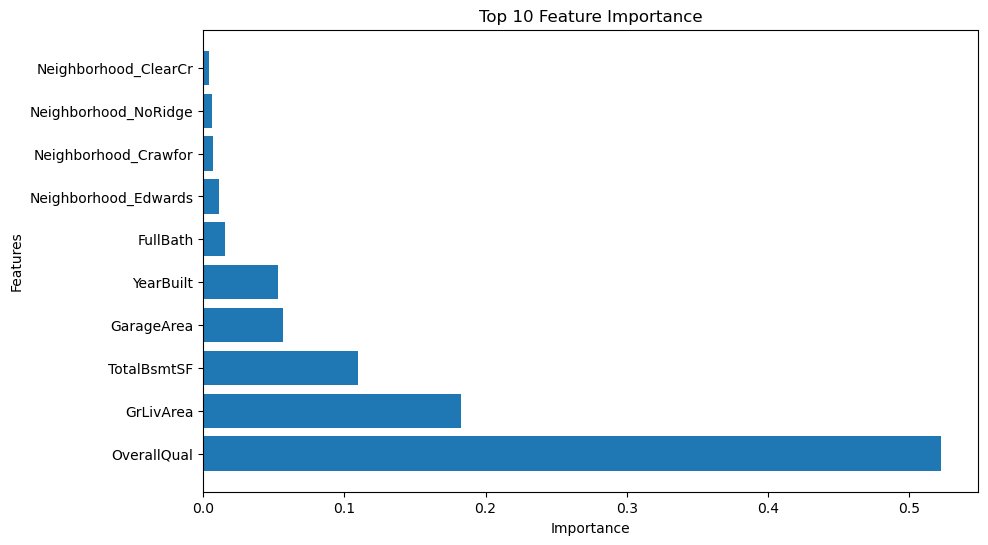

In [27]:
# Preprocess the combined dataset (including both numerical and categorical features)
X_train_combined_preprocessed = preprocessor.transform(X_train_combined)
X_valid_combined_preprocessed = preprocessor.transform(X_valid_combined)

# Fit the best model on the entire preprocessed training data
best_model.fit(X_train_combined_preprocessed, y_train)

# Get feature importance scores
feature_importance = best_model.feature_importances_

# Get the one-hot encoded feature names from the categorical transformer
categorical_onehot_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Create a DataFrame to store feature importance
all_feature_names = numerical_features + list(categorical_onehot_features)
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N important features for visualization
top_n = 10
top_features = feature_importance_df.head(top_n)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top {} Feature Importance'.format(top_n))
plt.show()


the top features include 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', and 'FullBath'. These features are likely to have the most significant impact on my model's predictions.

In [28]:
final_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea']

## Hyperparameter Tuning (2nd Try)

In [29]:
X_important = train_df[final_features]
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42) 

In [30]:
# Define the hyperparameter grid
param_grid2 = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
model = GradientBoostingRegressor()
grid_2 = GridSearchCV(model, param_grid2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_2.fit(X_train, y_train)

best_model_2 = grid_2.best_estimator_
best_params = grid_2.best_params_

y_pred = best_model_2.predict(X_test)
rms_2 = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("RMSE with Best Model:", rmse)
print("R-squared with Best Model:", r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
RMSE with Best Model: 35783.7266223903
R-squared with Best Model: 0.8330611950002655


<div style="background-color: #f0f0f0; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 25px; font-family: Arial;font-weight: bold;"> Make Predictions </h2>
</div>

In [31]:
# Select important features
test_important_features = test_df[final_features]  # Assuming final_features contains the important features

# Load the trained model with best hyperparameters
best_model = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=300, random_state=42)

# Fit the model on the entire training data
best_model.fit(X_important, y)  # X_important contains the important features from the training data

# Make predictions on test data
test_predictions = best_model.predict(test_important_features)

In [32]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})
print(submission.head())
# Write the submission file to csv
submission.to_csv('submission.csv', index=False)

     Id      SalePrice
0  1461  134722.656277
1  1462  151327.961828
2  1463  164846.377893
3  1464  175694.590834
4  1465  218099.870402
